In [73]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [25]:
res = {'FCN': {'MTS': [45.12447870002492, 27.632376800017852, 34.29802720000431, 43.146797000070336, 34.73427910001439, 67.48698380005526, 65.75372880001404, 48.68299030003749, 43.57523730003206, 27.499279000001977, 33.293461999989816, 51.38671750004785, 37.92432680000625, 73.45710430010953, 69.06830280002427, 23.65993119998053, 239.34159149994716, 65.20089300006464, 64.37193640011859, 40.55700500006167], 'EMS': [62.78047870002493, 36.609043466684504, 38.45802720000432, 72.61179700007034, 41.264279100014384, 112.43948380005526, 104.14872880001406, 71.77899030003749, 66.66523730003205, 38.439279000001974, 39.13346199998981, 83.43171750004785, 48.284326800006234, 114.11210430010955, 110.45496946669093, 28.931359771409102, 426.5244486428041, 92.36589300006466, 94.82393640011858, 53.525005000061675]}, 'VanillaTransformer': {'MTS': [33.163868099988456, 46.917500900068525, 25.50312339997223, 42.71618040003645, 22.436713499946027, 41.87039890001943, 30.393344799978966, 48.52923910003036, 27.710110099979936, 34.10144970002554, 30.820875399974877, 43.036465700009956, 26.700854899980808, 45.63951890001906, 49.45666200003857, 35.67973400002924, 72.71093750007765, 51.73341540005305, 43.79157480007978, 37.838463800029025], 'EMS': [52.38386809998845, 81.29750090006848, 36.47812339997223, 73.29618040003646, 29.82071349994603, 71.26039890001944, 47.35334479997896, 65.82257243336367, 36.45011009997994, 51.368116366692206, 35.810875399974876, 73.56646570000993, 34.10485489998081, 63.54618556668572, 86.43666200003854, 56.45373400002924, 137.5509375000776, 85.86341540005301, 57.366574800079775, 58.26513046669568]}}


In [56]:
mts_hits = np.sum([1 if vt < fcn else 0 for vt, fcn in zip(res['VanillaTransformer']['MTS'], res['FCN']['MTS'])])
mts_performance = (mts_hits * 100) / 20
mts_textstr = ''.join(f'VanillaTransformer predicts a lower Mean Time to Success {mts_performance}% of the time')

ems_hits = np.sum([1 if vt < fcn else 0 for vt, fcn in zip(res['VanillaTransformer']['EMS'], res['FCN']['EMS'])])
ems_performance = (ems_hits * 100) / 20
ems_textstr = ''.join(f'VanillaTransformer predicts a lower Makespan {ems_performance}% of the time')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

In [57]:
mts_textstr

'VanillaTransformer predicts a lower Mean Time to Success 85.0% of the time'

In [58]:
ems_textstr

'VanillaTransformer predicts a lower Makespan 75.0% of the time'

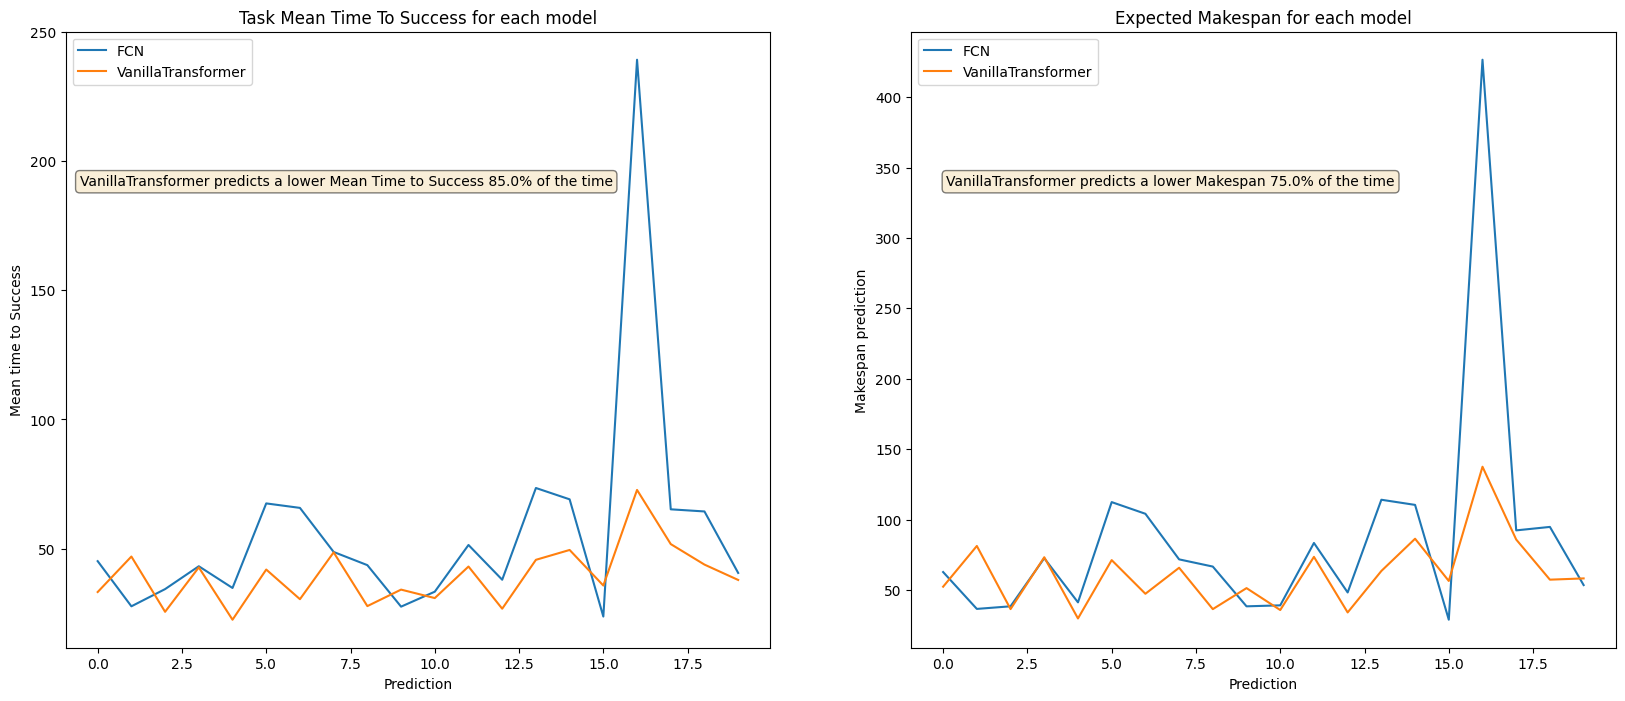

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].title.set_text('Task Mean Time To Success for each model')
axes[1].title.set_text('Expected Makespan for each model')
for model_name in res.keys():
    axes[0].plot(res[model_name]['MTS'], label=model_name)
    axes[1].plot(res[model_name]['EMS'], label=model_name)

axes[0].legend()
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Mean time to Success')
axes[0].text(0.02, 0.75, mts_textstr, transform=axes[0].transAxes, bbox=props)
axes[1].legend()
axes[1].set_xlabel('Prediction')
axes[1].set_ylabel('Makespan prediction')
axes[1].text(1.25, 0.75, ems_textstr, transform=axes[0].transAxes, bbox=props)
plt.show()

In [60]:
import numpy as np
np.sum([1 if vt < fcn else 0 for vt, fcn in zip(res['VanillaTransformer']['MTS'], res['FCN']['MTS'])])

17

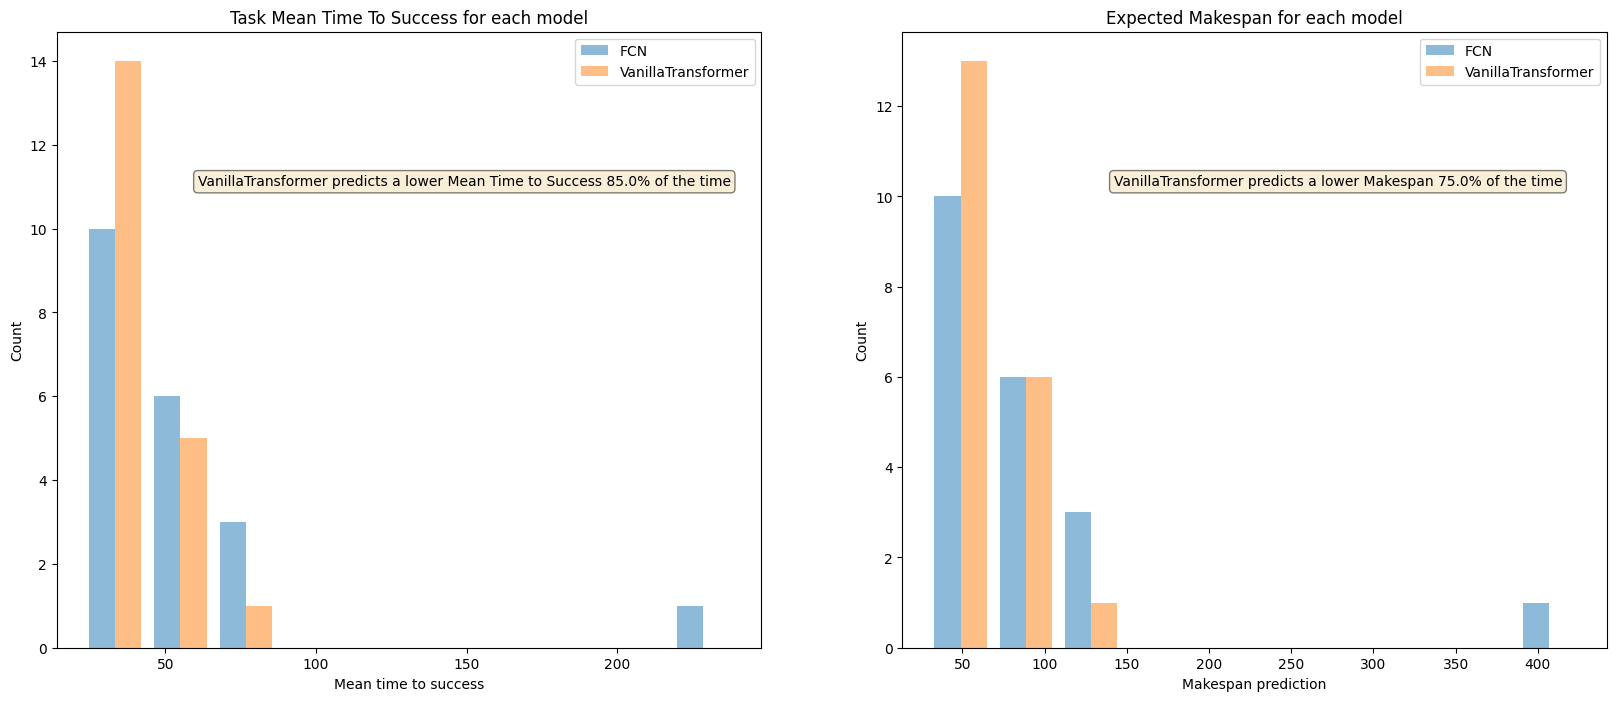

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].title.set_text('Task Mean Time To Success for each model')
axes[1].title.set_text('Expected Makespan for each model')
mts = []
ems = []
for model_name in res.keys():
    mts.append(res[model_name]['MTS'])
    ems.append(res[model_name]['EMS'])

axes[0].hist(mts, alpha=0.5, label=list(res.keys()), bins=10)
axes[1].hist(ems, alpha=0.5, label=list(res.keys()), bins=10)

axes[0].legend()
axes[0].set_xlabel('Mean time to success')
axes[0].set_ylabel('Count')
axes[0].text(0.2, 0.75, mts_textstr, transform=axes[0].transAxes, bbox=props)
axes[1].legend()
axes[1].set_xlabel('Makespan prediction')
axes[1].set_ylabel('Count')
axes[1].text(1.5, 0.75, ems_textstr, transform=axes[0].transAxes, bbox=props)
plt.show()

In [11]:
list(res.keys())

['FCN', 'VanillaTransformer']

In [16]:
[1 if vt < fcn else 0 for vt, fcn in zip(res['VanillaTransformer']['MTS'], res['FCN']['MTS'])]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

In [70]:
metrics = {k: {} for k in list(res.keys())}
for model_name in res.keys():
    metrics[model_name]['MTS_mean'] = np.mean(res[model_name]['MTS'])
    metrics[model_name]['MTS_std'] = np.std(res[model_name]['MTS'])
    metrics[model_name]['MTS_x'] = np.linspace(
        metrics[model_name]['MTS_mean'] - 3*metrics[model_name]['MTS_std'],
        metrics[model_name]['MTS_mean'] + 3*metrics[model_name]['MTS_std'],
        100
    )

    metrics[model_name]['EMS_mean'] = np.mean(res[model_name]['EMS'])
    metrics[model_name]['EMS_std'] = np.std(res[model_name]['EMS'])
    metrics[model_name]['EMS_x'] = np.linspace(
        metrics[model_name]['EMS_mean'] - 3*metrics[model_name]['EMS_std'],
        metrics[model_name]['EMS_mean'] + 3*metrics[model_name]['EMS_std'],
        100
    )

In [71]:
metrics

{'FCN': {'MTS_mean': 56.80977242503114,
  'MTS_std': 44.51851721478743,
  'MTS_x': array([-76.74577922, -74.04768727, -71.34959531, -68.65150336,
         -65.95341141, -63.25531946, -60.5572275 , -57.85913555,
         -55.1610436 , -52.46295165, -49.7648597 , -47.06676774,
         -44.36867579, -41.67058384, -38.97249189, -36.27439993,
         -33.57630798, -30.87821603, -28.18012408, -25.48203212,
         -22.78394017, -20.08584822, -17.38775627, -14.68966431,
         -11.99157236,  -9.29348041,  -6.59538846,  -3.8972965 ,
          -1.19920455,   1.4988874 ,   4.19697935,   6.89507131,
           9.59316326,  12.29125521,  14.98934716,  17.68743912,
          20.38553107,  23.08362302,  25.78171497,  28.47980692,
          31.17789888,  33.87599083,  36.57408278,  39.27217473,
          41.97026669,  44.66835864,  47.36645059,  50.06454254,
          52.7626345 ,  55.46072645,  58.1588184 ,  60.85691035,
          63.55500231,  66.25309426,  68.95118621,  71.64927816,
         

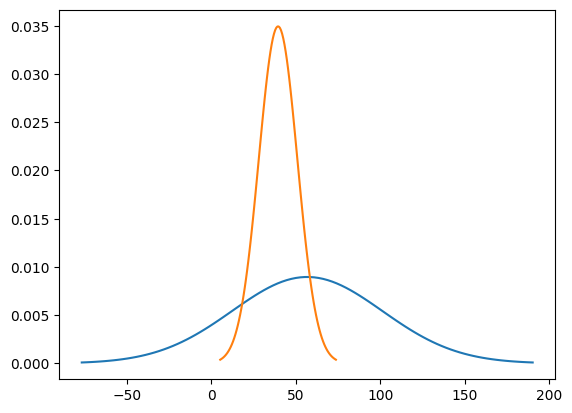

In [75]:
plt.plot(metrics['FCN']['MTS_x'], stats.norm.pdf(metrics['FCN']['MTS_x'], metrics['FCN']['MTS_mean'], metrics['FCN']['MTS_std']))
plt.plot(metrics['VanillaTransformer']['MTS_x'], stats.norm.pdf(metrics['VanillaTransformer']['MTS_x'], metrics['VanillaTransformer']['MTS_mean'], metrics['VanillaTransformer']['MTS_std']))

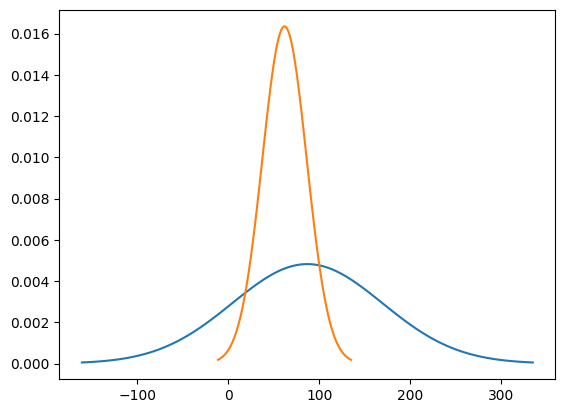

In [76]:
plt.plot(metrics['FCN']['EMS_x'], stats.norm.pdf(metrics['FCN']['EMS_x'], metrics['FCN']['EMS_mean'], metrics['FCN']['EMS_std']))
plt.plot(metrics['VanillaTransformer']['EMS_x'], stats.norm.pdf(metrics['VanillaTransformer']['EMS_x'], metrics['VanillaTransformer']['EMS_mean'], metrics['VanillaTransformer']['EMS_std']))

In [86]:
import os, sys
sys.path.insert(1, os.path.realpath('..'))
from Transformer.CustomSchedule import CustomSchedule

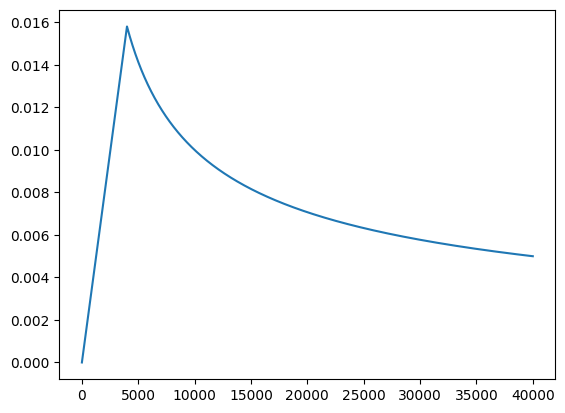

In [89]:
learning_rate = CustomSchedule(d_model=1)
plt.plot(learning_rate(np.arange(40000)))